# Project Final


## Flower Project 

Steps: 
1. Load Images
2. Create PCA and Classification on images (dataset has labels available)
3. Identify common/dominate colors and plot 

https://www.kaggle.com/datasets/olgabelitskaya/flower-color-images/data

In [ ]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/image_utils.py
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py


# from HW10_utils import AwesomeImageClassifier

In [1]:
from data_utils import KMeansClustering, SpectralClustering

In [2]:

from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# import tensorflow as tf
from os import listdir, path
from image_utils import  open_image, make_image

import colorsys

In [3]:
# Load Image
flower_files = [f for f in listdir("./data/flower") if f.endswith(".png")]
print(flower_files)
sort_flower = sorted(flower_files)
print(sort_flower)

['0029.png', '0168.png', '0180.png', '0038.png', '0064.png', '0143.png', '0077.png', '0202.png', '0138.png', '0014.png', '0175.png', '0122.png', '0004.png', '0033.png', '0094.png', '0099.png', '0114.png', '0142.png', '0162.png', '0106.png', '0062.png', '0001.png', '0167.png', '0068.png', '0186.png', '0125.png', '0176.png', '0053.png', '0035.png', '0112.png', '0088.png', '0043.png', '0070.png', '0146.png', '0017.png', '0008.png', '0116.png', '0093.png', '0110.png', '0154.png', '0049.png', '0193.png', '0152.png', '0185.png', '0195.png', '0206.png', '0173.png', '0076.png', '0203.png', '0050.png', '0196.png', '0192.png', '0210.png', '0047.png', '0132.png', '0013.png', '0208.png', '0151.png', '0205.png', '0022.png', '0025.png', '0144.png', '0083.png', '0199.png', '0065.png', '0161.png', '0182.png', '0136.png', '0009.png', '0019.png', '0184.png', '0187.png', '0145.png', '0048.png', '0069.png', '0010.png', '0055.png', '0075.png', '0204.png', '0058.png', '0108.png', '0150.png', '0126.png', '00

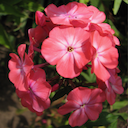

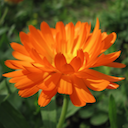

In [11]:
fimg = open_image("data/flower/0001.png")
display(fimg)

fimg2 = open_image("data/flower/0003.png")
display(fimg2)

In [5]:
flower_df = pd.read_csv('data/flower/flower_labels.csv')
flower_df.head()
flower_df['label'] 

0      0
1      0
2      2
3      0
4      0
      ..
205    6
206    0
207    4
208    6
209    1
Name: label, Length: 210, dtype: int64

# Milestone 2

I plotted the first image to understand how the flower colors were divided and developed a data frame from the image.


# Image 1

In [6]:
pixel_data = []
label_data = []
flower_df = pd.DataFrame(pixel_data)
flower_df["label"] = label_data
for fname in sort_flower:
  img = open_image(path.join("./data/flower", fname))
  img_cropped = img.crop((0, 0, 200,200))
  pixel_data.append(img_cropped.pixels)

train_df = pd.DataFrame(pixel_data)
train_df

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,"(13, 22, 10, 255)","(14, 23, 9, 255)","(16, 24, 10, 255)","(16, 24, 11, 255)","(16, 24, 10, 255)","(16, 24, 10, 255)","(16, 24, 10, 255)","(17, 24, 11, 255)","(17, 26, 12, 255)","(18, 26, 12, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
1,"(38, 49, 30, 255)","(37, 50, 30, 255)","(38, 52, 30, 255)","(40, 52, 31, 255)","(40, 52, 29, 255)","(36, 50, 28, 255)","(33, 46, 27, 255)","(35, 47, 31, 255)","(39, 54, 38, 255)","(44, 62, 46, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
2,"(65, 83, 48, 255)","(72, 87, 58, 255)","(74, 90, 62, 255)","(81, 91, 57, 255)","(100, 95, 48, 255)","(115, 101, 44, 255)","(116, 99, 39, 255)","(109, 87, 32, 255)","(101, 73, 25, 255)","(94, 66, 22, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
3,"(162, 53, 102, 255)","(147, 66, 91, 255)","(156, 80, 97, 255)","(169, 73, 107, 255)","(188, 60, 124, 255)","(204, 69, 146, 255)","(215, 98, 166, 255)","(219, 124, 177, 255)","(222, 142, 185, 255)","(225, 153, 191, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
4,"(193, 52, 78, 255)","(194, 51, 76, 255)","(195, 58, 85, 255)","(197, 75, 101, 255)","(194, 61, 88, 255)","(194, 45, 74, 255)","(198, 53, 78, 255)","(196, 57, 77, 255)","(195, 49, 65, 255)","(188, 37, 53, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,"(95, 171, 41, 255)","(84, 164, 31, 255)","(81, 157, 39, 255)","(90, 160, 64, 255)","(95, 168, 79, 255)","(111, 178, 92, 255)","(109, 176, 95, 255)","(87, 165, 86, 255)","(71, 152, 72, 255)","(67, 145, 64, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
206,"(13, 14, 12, 255)","(12, 14, 11, 255)","(12, 14, 11, 255)","(12, 13, 10, 255)","(11, 13, 10, 255)","(10, 12, 9, 255)","(11, 11, 9, 255)","(10, 10, 9, 255)","(10, 10, 8, 255)","(10, 10, 8, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"
207,"(5, 5, 5, 255)","(4, 4, 4, 255)","(4, 4, 4, 255)","(6, 6, 6, 255)","(5, 5, 5, 255)","(3, 3, 3, 255)","(4, 4, 4, 255)","(7, 7, 7, 255)","(9, 10, 9, 255)","(13, 15, 12, 255)",...,"(7, 7, 7, 255)","(7, 7, 7, 255)","(7, 7, 7, 255)","(8, 8, 8, 255)","(9, 9, 9, 255)","(10, 10, 10, 255)","(10, 10, 10, 255)","(8, 8, 8, 255)","(6, 6, 6, 255)","(4, 4, 4, 255)"
208,"(69, 82, 51, 255)","(71, 83, 52, 255)","(66, 77, 44, 255)","(52, 56, 37, 255)","(56, 58, 41, 255)","(64, 71, 52, 255)","(75, 81, 67, 255)","(82, 87, 75, 255)","(82, 87, 79, 255)","(83, 87, 78, 255)",...,"(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)","(0, 0, 0, 0)"


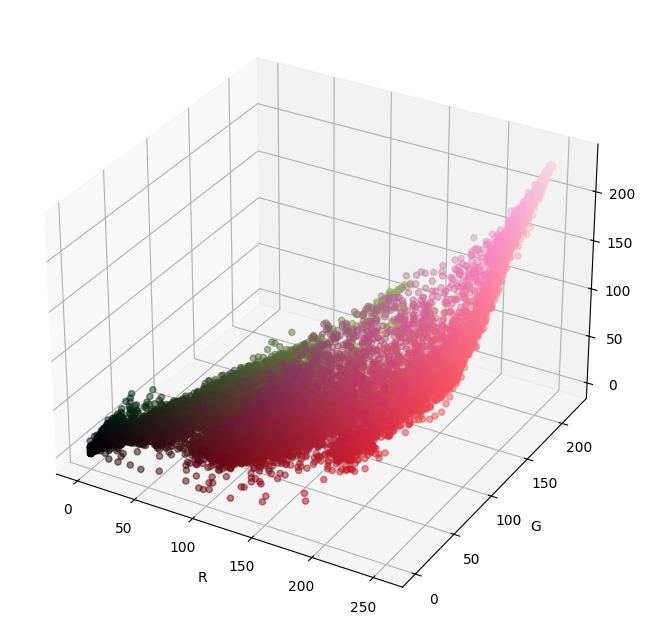

In [7]:
# Clustering images to find dominate color 
pixelObj = [{"R":r, "G":g, "B":b} for r,g,b,a in fimg.pixels]

img_df = pd.DataFrame.from_records(pixelObj)

img_df.head()

c = [(r/255, g/255, b/255) for r,g,b,a in fimg.pixels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(img_df["R"], img_df["G"], img_df["B"], c=c, marker='o', linestyle='', alpha=0.5)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
plt.show()


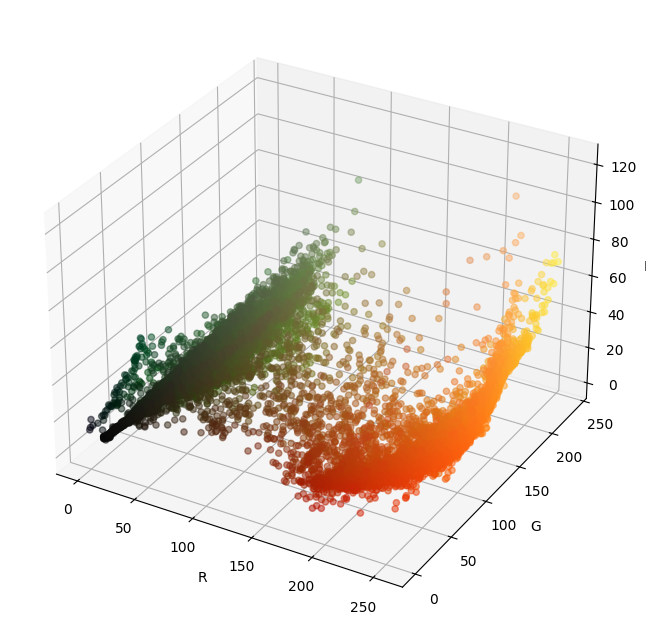

In [8]:
# Clustering images to find dominate color 
pixelObj = [{"R":r, "G":g, "B":b} for r,g,b,a in fimg2.pixels]

img_df = pd.DataFrame.from_records(pixelObj)

img_df.head()

c = [(r/255, g/255, b/255) for r,g,b,a in fimg2.pixels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(img_df["R"], img_df["G"], img_df["B"], c=c, marker='o', linestyle='', alpha=0.5)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")
plt.show()

# Milestone 3 

In this milestone, I transformed the rgb to hls and back to rgb to create posterized version of the image. 
I also developed a function to plot and cluster the dominate colors and the pixels. 

          H         L         S
0  0.291667  0.062745  0.375000
1  0.273810  0.062745  0.437500
2  0.261905  0.066667  0.411765
3  0.269231  0.068627  0.371429
4  0.261905  0.066667  0.411765


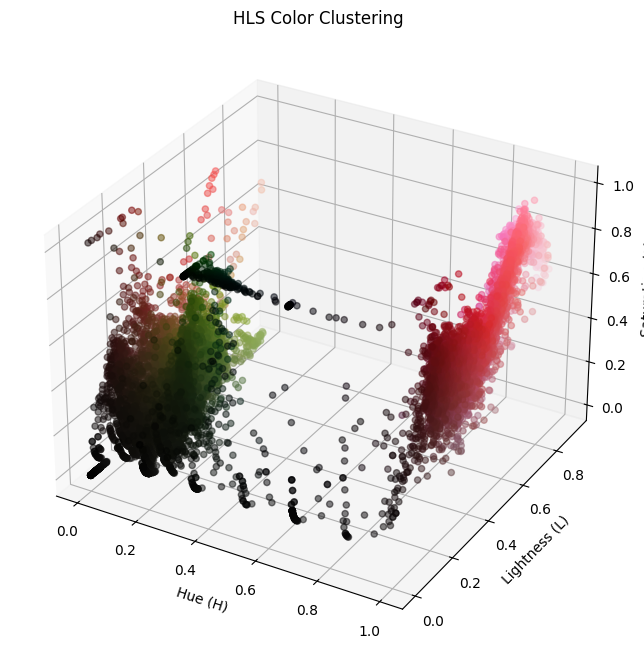

In [9]:
# Image 1
hls_pixels = [
    {"H": h, "L": l, "S": s}
    for r, g, b, a in fimg.pixels if a != 0
    for h, l, s in [colorsys.rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)]
]

hls_df = pd.DataFrame(hls_pixels)
print(hls_df.head())

rgb_colors = [
    tuple(int(c * 255) for c in colorsys.hls_to_rgb(h, l, s))
    for h, l, s in zip(hls_df["H"], hls_df["L"], hls_df["S"])
]
rgb_colors_normalized = [(r / 255.0, g / 255.0, b / 255.0) for r, g, b in rgb_colors]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(hls_df["H"], hls_df["L"], hls_df["S"], c=rgb_colors_normalized, marker='o', alpha=0.5)
ax.set_xlabel("Hue (H)")
ax.set_ylabel("Lightness (L)")
ax.set_zlabel("Saturation (S)")
ax.set_title("HLS Color Clustering")
plt.show()


          H         L         S
0  0.252381  0.256863  0.267176
1  0.252874  0.284314  0.200000
2  0.261905  0.298039  0.184211
3  0.215686  0.290196  0.229730
4  0.150641  0.290196  0.351351


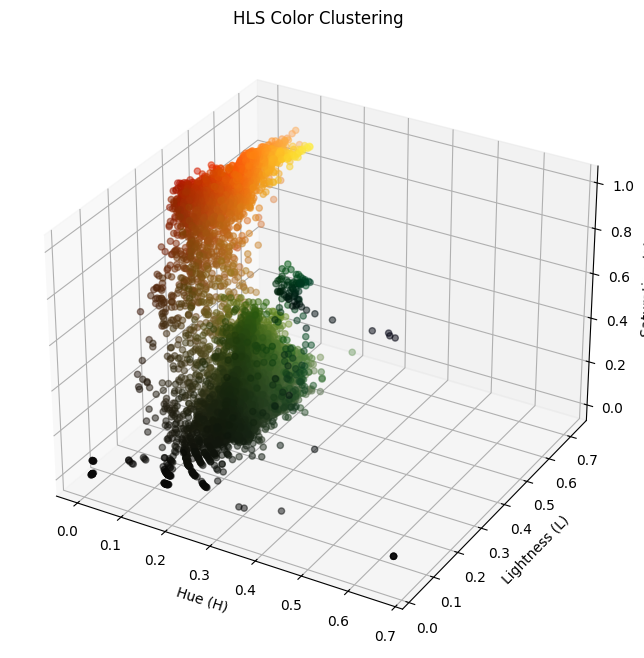

In [10]:
# Image 2
hls_pixels = [
    {"H": h, "L": l, "S": s}
    for r, g, b, a in fimg2.pixels if a != 0
    for h, l, s in [colorsys.rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)]
]

hls_df = pd.DataFrame(hls_pixels)
print(hls_df.head())

rgb_colors = [
    tuple(int(c * 255) for c in colorsys.hls_to_rgb(h, l, s))
    for h, l, s in zip(hls_df["H"], hls_df["L"], hls_df["S"])
]
rgb_colors_normalized = [(r / 255.0, g / 255.0, b / 255.0) for r, g, b in rgb_colors]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(hls_df["H"], hls_df["L"], hls_df["S"], c=rgb_colors_normalized, marker='o', alpha=0.5)
ax.set_xlabel("Hue (H)")
ax.set_ylabel("Lightness (L)")
ax.set_zlabel("Saturation (S)")
ax.set_title("HLS Color Clustering")
plt.show()


In [11]:
n_clusters=4

## Create Clustering object
km_model = KMeansClustering(n_clusters=n_clusters)

## Run the model on the pixel data
km_predicted = km_model.fit_predict(hls_df)

km_predicted.head()

,clusters
0,2
1,2
2,2
3,2
4,2


In [12]:
color_centers = km_model.cluster_centers_
color_centers

[[0.06180291722646102, 0.47245531189665313, 0.9219673978782383],
 [0.22296120779309636, 0.22108165399103377, 0.5991335474721445],
 [0.2396286737153653, 0.2868577203412318, 0.33308752453434964],
 [0.25362131453159886, 0.14457768375981325, 0.32912844398664787]]

In [13]:
# # TODO: use round() or int() to ensure our cluster centers are valid color values (ints)
# color_centers = [[round(h), round(l), round(s)] for h,l,s in km_model.cluster_centers_]
# #
# print(color_centers)

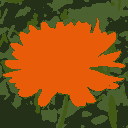

In [14]:
clustered_pxs = []

# # TODO: iterate through the cluster list and append the right color for each pixel
for gidx in km_predicted["clusters"]:
  h,l,s = color_centers[gidx]
  r, g, b = colorsys.hls_to_rgb(h, l, s)
  clustered_pxs.append([int(r*255), int(g*255), int(b*255)])

display(make_image(clustered_pxs, fimg.size[0]))

# Function for HLS Clustering 

In [5]:
def hls_clustering(image):
    hls_pixels = [
        {"H": h, "L": l, "S": s}
        for r, g, b, a in image.pixels if a != 0
        for h, l, s in [colorsys.rgb_to_hls(r / 255.0, g / 255.0, b / 255.0)]
    ]

    hls_df = pd.DataFrame(hls_pixels)
    # print(hls_df.head())

    rgb_colors = [
        tuple(int(c * 255) for c in colorsys.hls_to_rgb(h, l, s))
        for h, l, s in zip(hls_df["H"], hls_df["L"], hls_df["S"])
    ]
    rgb_colors_normalized = [(r / 255.0, g / 255.0, b / 255.0) for r, g, b in rgb_colors]

    # fig = plt.figure(figsize=(8, 8))
    # ax = fig.add_subplot(projection='3d')
    # ax.scatter(hls_df["H"], hls_df["L"], hls_df["S"], c=rgb_colors_normalized, marker='o', alpha=0.5)
    # ax.set_xlabel("Hue (H)")
    # ax.set_ylabel("Lightness (L)")
    # ax.set_zlabel("Saturation (S)")
    # ax.set_title("HLS Color Clustering")
    # plt.show()
    
    n_clusters=2

    ## Create Clustering object
    km_model = KMeansClustering(n_clusters=n_clusters)

    ## Run the model on the pixel data
    km_predicted = km_model.fit_predict(hls_df)
    color_centers = km_model.cluster_centers_

    return km_predicted["clusters"], color_centers


# Image 1 Cluster

In [26]:
cluster1, color1= hls_clustering(fimg)
print(color1)
color1[0][0], color1[1][0]



[[0.1659085770568625, 0.1530013759889921, 0.3287761894598621], [0.967738514035584, 0.5237409817199942, 0.6826681016715824]]


(0.1659085770568625, 0.967738514035584)

In [29]:
# Example result from hls_clustering
cluster1, color1 = hls_clustering(fimg)

# Print the color1 structure for debugging
print("Color1:", color1)

# Target lightness
target = 0.33

# Initialize variables
min_difference = float('inf')
closest_index = None

# Iterate through the lightness values in color1
for i in range(len(color1)):
    lightness = color1[i][0]  # Extract the lightness value
    difference = abs(lightness - target)  # Calculate the difference

    # Update the closest color if a smaller difference is found
    if difference < min_difference:
        min_difference = difference
        closest_index = i

# Output the closest color
print(f"The closest color to 33% lightness is color1[{closest_index}] with lightness {color1[closest_index][0]}")


Color1: [[0.1659085770568625, 0.1530013759889921, 0.3287761894598621], [0.967738514035584, 0.5237409817199942, 0.6826681016715824]]
The closest color to 33% lightness is color1[0] with lightness 0.1659085770568625


# Image 2 Cluster

In [10]:
cluster2, color2= hls_clustering(fimg2)

NameError: name 'fimg2' is not defined

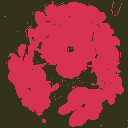

In [27]:
clustered_pxs = []

# # TODO: iterate through the cluster list and append the right color for each pixel
for gidx in cluster1:
  h,l,s = color1[gidx]
  r, g, b = colorsys.hls_to_rgb(h, l, s)
  clustered_pxs.append([int(r*255), int(g*255), int(b*255)])

display(make_image(clustered_pxs, fimg.size[0]))

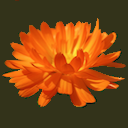

In [28]:
clustered_pxs = []

# TODO: iterate through the cluster list and append the right color for each pixel
for pidx, gidx in enumerate(cluster2):
  if gidx == 0 :
    # keep hue
    # r,g,b for pidx[fimg2] turn this to hls 
    # swap H from source to H in destination 
    h,l,s = color1[0]
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    clustered_pxs.append([int(r*255), int(g*255), int(b*255)])
  elif gidx == 3:
    h,l,s = color1[1]
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    clustered_pxs.append([int(r*255), int(g*255), int(b*255)])
  else: 
    r, g, b,a = fimg2.pixels[pidx]
    clustered_pxs.append([r,g,b])
  

display(make_image(clustered_pxs, fimg.size[0]))

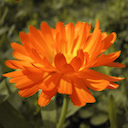

In [29]:
clustered_pxs = []
for pidx, gidx in enumerate(cluster2):
    if gidx == 0:
        # Convert destination pixel to HLS
        r_dst, g_dst, b_dst, a_dst = fimg2.pixels[pidx]
        h_dst, l_dst, s_dst = colorsys.rgb_to_hls(r_dst / 255.0, g_dst / 255.0, b_dst / 255.0)

        
        h_src, _, _ = color1[0]  

        h_new = h_src
        l_new = l_dst
        s_new = s_dst

        r_new, g_new, b_new = colorsys.hls_to_rgb(h_new, l_new, s_new)
        clustered_pxs.append([int(r_new * 255), int(g_new * 255), int(b_new * 255)])
    elif gidx == 2:
        r_dst, g_dst, b_dst, a_dst = fimg2.pixels[pidx]
        h_dst, l_dst, s_dst = colorsys.rgb_to_hls(r_dst / 255.0, g_dst / 255.0, b_dst / 255.0)
        h_src, _, _ = color1[1]

        h_new = h_src
        l_new = l_dst
        s_new = s_dst

        r_new, g_new, b_new = colorsys.hls_to_rgb(h_new, l_new, s_new)
        clustered_pxs.append([int(r_new * 255), int(g_new * 255), int(b_new * 255)])
    else:
        # Keep the original RGB from the destination image
        r, g, b, a = fimg2.pixels[pidx]
        clustered_pxs.append([r, g, b])

display(make_image(clustered_pxs, fimg.size[0]))

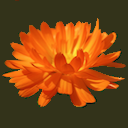

In [30]:
clustered_pxs = []

# TODO: iterate through the cluster list and append the right color for each pixel
for pidx, gidx in enumerate(cluster2):
  if gidx == 0 :
    # keep hue
    # r,g,b for pidx[fimg2] turn this to hls 
    # swap H from source to H in destination 
    h,l,s = color1[0]
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    clustered_pxs.append([int(r*255), int(g*255), int(b*255)])
  elif gidx == 3:
    h,l,s = color1[1]
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    clustered_pxs.append([int(r*255), int(g*255), int(b*255)])
  else: 
    r, g, b,a = fimg2.pixels[pidx]
    clustered_pxs.append([r,g,b])
  
  

display(make_image(clustered_pxs, fimg.size[0]))

# Milestone 4
1. create list of images 
2. create for loop to create cluster[i] and color[i] from list of images 
3. when looping image list, create image_list[i] and image_list[i+1]


In [6]:
flower_files = [f for f in listdir("./data/flower") if f.endswith(".png")]

sorted_flower_files = sorted(flower_files)
sorted_flower_files

['0001.png',
 '0002.png',
 '0003.png',
 '0004.png',
 '0005.png',
 '0006.png',
 '0007.png',
 '0008.png',
 '0009.png',
 '0010.png',
 '0011.png',
 '0012.png',
 '0013.png',
 '0014.png',
 '0015.png',
 '0016.png',
 '0017.png',
 '0018.png',
 '0019.png',
 '0020.png',
 '0021.png',
 '0022.png',
 '0023.png',
 '0024.png',
 '0025.png',
 '0026.png',
 '0027.png',
 '0028.png',
 '0029.png',
 '0030.png',
 '0031.png',
 '0032.png',
 '0033.png',
 '0034.png',
 '0035.png',
 '0036.png',
 '0037.png',
 '0038.png',
 '0039.png',
 '0040.png',
 '0041.png',
 '0042.png',
 '0043.png',
 '0044.png',
 '0045.png',
 '0046.png',
 '0047.png',
 '0048.png',
 '0049.png',
 '0050.png',
 '0051.png',
 '0052.png',
 '0053.png',
 '0054.png',
 '0055.png',
 '0056.png',
 '0057.png',
 '0058.png',
 '0059.png',
 '0060.png',
 '0061.png',
 '0062.png',
 '0063.png',
 '0064.png',
 '0065.png',
 '0066.png',
 '0067.png',
 '0068.png',
 '0069.png',
 '0070.png',
 '0071.png',
 '0072.png',
 '0073.png',
 '0074.png',
 '0075.png',
 '0076.png',
 '0077.png',

In [34]:
clusters = []
colors = []
image_pairs = []

# Create a for loop to process the images
for i in range(0, len(sorted_flower_files)//4 - 1, 2): 
    # Load the current image and the next image
    current_image = open_image(f"./data/flower/{sorted_flower_files[i]}")
    next_image = open_image(f"./data/flower/{sorted_flower_files[i + 1]}")
    cluster1, color1= hls_clustering(current_image)
    cluster2, color2= hls_clustering(next_image)
    clustered_pxs = []
    for pidx, gidx in enumerate(cluster1):
        if gidx == 0:
            # Convert destination pixel to HLS
            r_dst, g_dst, b_dst, a_dst = next_image.pixels[pidx]
            h_dst, l_dst, s_dst = colorsys.rgb_to_hls(r_dst / 255.0, g_dst / 255.0, b_dst / 255.0)

            
            h_src, _, _ = color1[0]  

            h_new = h_src
            l_new = l_dst
            s_new = s_dst

            r_new, g_new, b_new = colorsys.hls_to_rgb(h_new, l_new, s_new)
            clustered_pxs.append([int(r_new * 255), int(g_new * 255), int(b_new * 255)])
        # elif gidx == 2:
        #     r_dst, g_dst, b_dst, a_dst = next_image.pixels[pidx]
        #     h_dst, l_dst, s_dst = colorsys.rgb_to_hls(r_dst / 255.0, g_dst / 255.0, b_dst / 255.0)
        #     h_src, _, _ = color1[1]

        #     h_new = h_src
        #     l_new = l_dst
        #     s_new = s_dst

        #     r_new, g_new, b_new = colorsys.hls_to_rgb(h_new, l_new, s_new)
        #     clustered_pxs.append([int(r_new * 255), int(g_new * 255), int(b_new * 255)])
        else:
            # Keep the original RGB from the destination image
            r, g, b, a = next_image.pixels[pidx]
            clustered_pxs.append([r, g, b])
    # # Append cluster and color information (example: placeholder values)
    # clusters.append(f"cluster_{i}")  
    # colors.append(f"color_{i}")

    # Append image pair
    new_image = make_image(clustered_pxs, current_image.size[0])
    image_pairs.append((current_image, new_image))


print("Clusters:", clusters)
print("Colors:", colors)
print("Image Pairs:", image_pairs[:2])

Clusters: []
Colors: []
Image Pairs: [(<PIL.Image.Image image mode=RGBA size=128x128 at 0x77B683BCD2B0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x77B67B471790>), (<PIL.Image.Image image mode=RGBA size=128x128 at 0x77B683BCE690>, <PIL.Image.Image image mode=RGB size=128x128 at 0x77B67B473650>)]


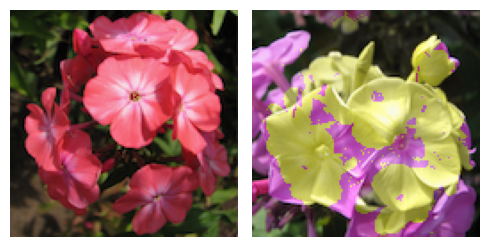

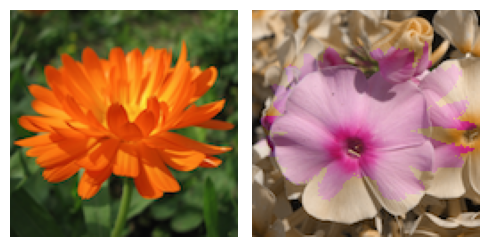

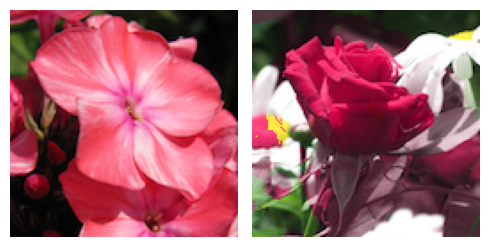

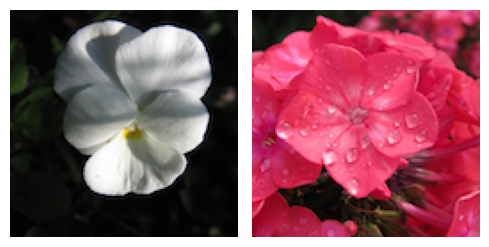

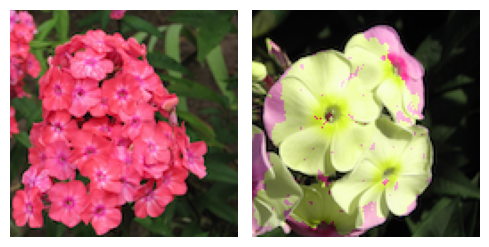

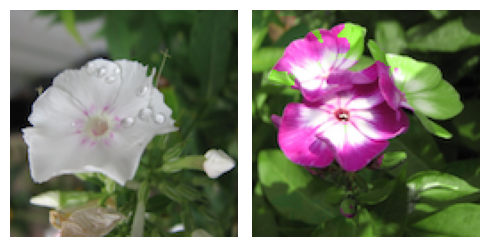

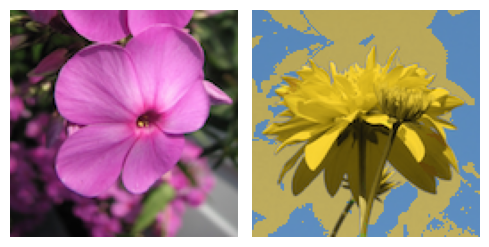

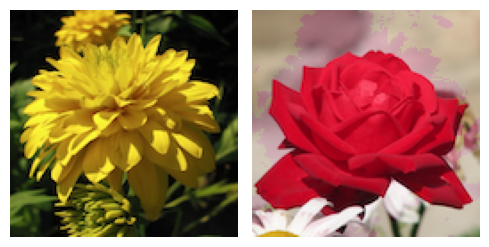

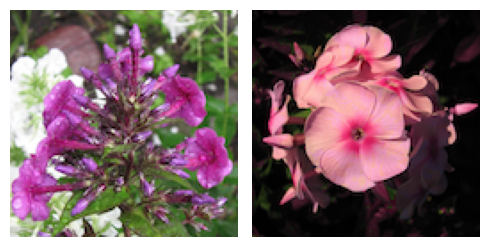

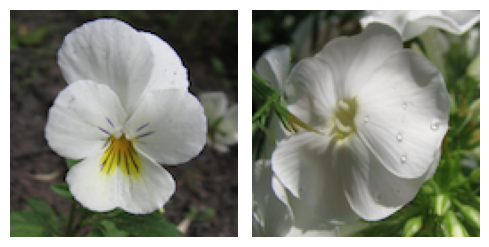

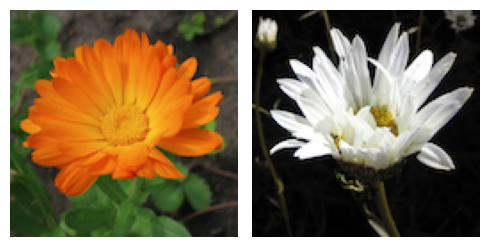

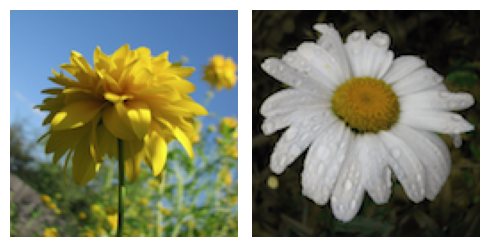

In [40]:
for i, (img1, img2) in enumerate(image_pairs[:12]): 
    plt.figure(figsize=(5, 5))

    # Display the first image in the pair
    plt.subplot(1, 2, 1) 
    plt.imshow(img1)
    plt.axis("off")
    # plt.title(f"Image Pair {i+1} - Image 1")

    plt.subplot(1, 2, 2) 
    plt.imshow(img2)
    plt.axis("off")
    # plt.title(f"Image Pair {i+1} - Image 2")

    plt.tight_layout()
    plt.show()